In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#Esto hace que podamos exportar y mostrar en un browser:
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import row

#Esto carga las herramientas básicas de ploteado:

from bokeh.plotting import figure
output_notebook()
plot = figure(plot_width=400, tools='pan,box_zoom')

Loading BokehJS ...

In [73]:
r1 = plot.circle([1,2,3],[4,5,6], size=20)
t=show(row(plot), notebook_handle=True)

In [64]:
bar = plot.vbar(table,  top ='RELEVANCIA EN EL MODELO', width=300,
          legend='top_right')

In [67]:
show(row(bar), notebook_handle=True)

ValueError: Only LayoutDOM items can be inserted into a row.
                Tried to insert: GlyphRenderer(id='b3804b74-817a-4714-a79f-cb8891837d30', ...) of type <class 'bokeh.models.renderers.GlyphRenderer'>

In [8]:
file = '.\warnings_csv.csv'
table = pd.read_csv(file)
table

,TIPO DE WARNING,RELEVANCIA EN EL MODELO,RELEVANCIA EN EL DISEÑO,A QUÉ AFECTA EN EL MODELO,A QUÉ AFECTA EN EL DISEÑO
0,EL DESEMBARCO DE LA ESCALERA NO LLEGA O EXCEDE...,5,90,NO SE VE AFECTADO EL RENDIMIENTO,LA ESCALERA PUEDE ESTAR MAL DISEÑADA
1,EL MURO Y UNA LÍNEA DE SEPARACIÓN DE HABITACIÓ...,70,5,EL PROGRAMA INTENTA CALCULAR CONTINUAMENTE EL ...,NO SE APRECIA
2,EL PLANO DE REFERENCIA ESTÁ LIGERAMENTE FUERA ...,80,5,EL RENDIMIENTO SE VE MUY AFECTADO Y TODOS LOS ...,CASI INAPRECIABLE
3,EXISTE MÁS DE UNA HABITACIÓN EN LA MISMA REGIÓN,60,30,MAL RENDIMIENTO,SE CONTABILIZA UNA HABITACIÓN SIN ÁREA
4,EXISTEN INSTANCIAS IDÉNTICAS DE UN ELEMENTO QU...,70,100,AFECTA AL RENDIMIENTO DEL MODELO,SE CONTABILIZA UN MISMO ELEMENTO COMPLETO DOS ...
5,LA ANCHURA REAL DEL TRAMO DE LA ESCALERA ES ME...,5,90,NO SE VE AFECTADO EL RENDIMIENTO,LA ESCALERA PUEDE ESTAR MAL DISEÑADA
6,LA APERTURA RECTANGULAR NO CORTA SU HUESPED,40,0,EL SOFTWARE INTENTA CONTINUEAMENTE CALCULAR LA...,NO SE APRECIA
7,LA LÍNEA DE BOCETO ESTÁ LIGERAMENTE FUERA DE EJE,40,5,EL RENDIMIENTO SE VE AFECTADO,CASI INAPRECIABLE
8,LA REJILLA ESTÁ LIGERAMENTE FUERA DE EJE,90,10,EL RENDIMIENTO SE VE MUY AFECTADO Y TODOS LOS ...,CASI INAPRECIABLE
9,LOS ELEMENTOS NO SE UNIERON AUTOMÁTICAMENTE PO...,10,80,UNIONES,UNA UNIÓN NO QUEDA COMO DEBERÍA


In [2]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [4]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [5]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()



In [6]:


show(p, notebook_handle=True)



In [7]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

A Jupyter Widget

<function __main__.update>

In [6]:
# myapp.py

from random import random

from bokeh.layouts import column
from bokeh.models import Button
from bokeh.palettes import RdYlBu3
from bokeh.plotting import figure, curdoc

# create a plot and style its properties
p = figure(x_range=(0, 100), y_range=(0, 100), toolbar_location=None)
p.border_fill_color = 'black'
p.background_fill_color = 'black'
p.outline_line_color = None
p.grid.grid_line_color = None

# add a text renderer to our plot (no data yet)
r = p.text(x=[], y=[], text=[], text_color=[], text_font_size="20pt",
           text_baseline="middle", text_align="center")

i = 0

ds = r.data_source

# create a callback that will add a number in a random location
def callback():
    global i

    # BEST PRACTICE --- update .data in one step with a new dict
    new_data = dict()
    new_data['x'] = ds.data['x'] + [random()*70 + 15]
    new_data['y'] = ds.data['y'] + [random()*70 + 15]
    new_data['text_color'] = ds.data['text_color'] + [RdYlBu3[i%3]]
    new_data['text'] = ds.data['text'] + [str(i)]
    ds.data = new_data

    i = i + 1

# add a button widget and configure with the call back
button = Button(label="Press Me")
button.on_click(callback)

# put the button and plot in a layout and add to the document
curdoc().add_root(column(button, p))
bokeh json myapp.py

SyntaxError: invalid syntax (<ipython-input-6-7c5c3b7ef6aa>, line 45)

In [7]:
bokeh serve myapp.py

SyntaxError: invalid syntax (<ipython-input-7-365954ebd08c>, line 1)

C:\Users\usuario\Anaconda3\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


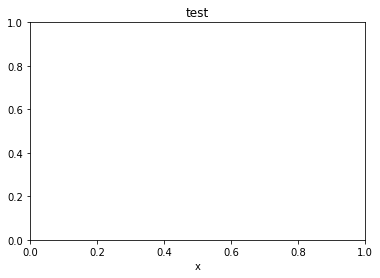

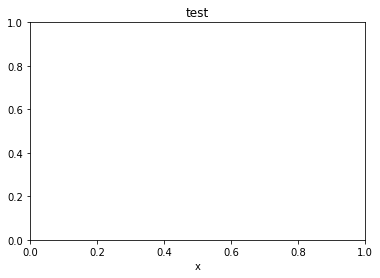

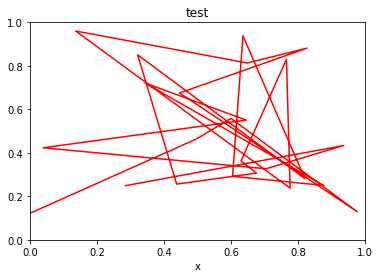

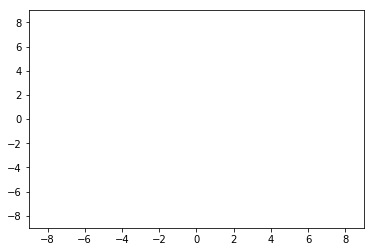

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('./lines.html')

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()